In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
import itertools

In [2]:
df = pd.read_csv(filepath_or_buffer="https://web.stanford.edu/~hastie/Papers/LARS/diabetes.data",sep="\t")
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [3]:
#missing values
print(df.isnull().sum())


AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64


C:\Users\tanma\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI'>

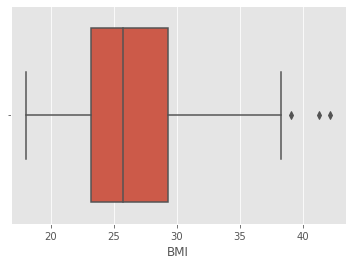

In [4]:
sns.boxplot(df['BMI'])

In [5]:
#outliers remove

for i in range(0,10):
    

    q1=df.iloc[:,i].quantile(.25)
    q3=df.iloc[:,i].quantile(.75)
    iqr=q3-q1
    low=q1-1.5*iqr
    high=q3+1.5*iqr

    df.iloc[:,i]=np.where(df.iloc[:,i]<low,low,df.iloc[:,i])
    df.iloc[:,i]=np.where(df.iloc[:,i]>high,high,df.iloc[:,i])

In [6]:
df

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220


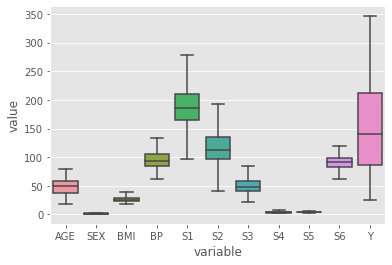

In [7]:
import seaborn as sns
sns.boxplot(x="variable",y="value",data=pd.melt(df))
plt.show()  

In [8]:
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.358965,94.647014,188.986425,115.213857,49.643665,4.067149,4.641183,91.228790,152.133484
std,13.109028,0.499561,4.365892,13.831283,34.172164,29.715466,12.476566,1.279829,0.521757,11.346132,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,61.125000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,38.387500,133.000000,278.000000,192.175000,84.000000,8.000000,6.077950,120.125000,346.000000


In [9]:
df.shape

(442, 11)

<AxesSubplot:>

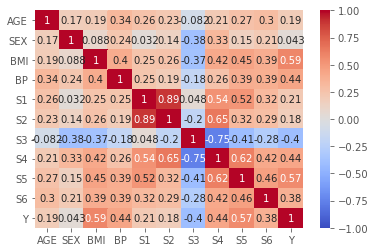

In [10]:
sns.heatmap(df.corr(), annot=True, vmin=-1 , vmax=1, cmap='coolwarm')

In [11]:
cols = list(df.columns)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["Y"]), df["Y"], test_size=0.2, random_state=27)

In [13]:
norm = Normalizer()
X_train_normalized = norm.fit_transform(X_train)
X_test_normalized = norm.transform(X_test)

<h1>Question 1</h1>


AGE and Y:
Slope: [108.11721256]	Intercept: 130.98232549100354


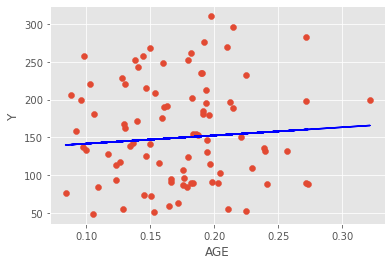

MSE: 4551.496224565266
R2: -0.014597569438919988

SEX and Y:
Slope: [-3194.41563383]	Intercept: 168.59996825198877


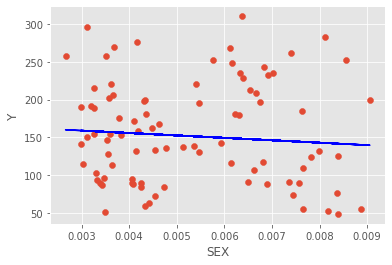

MSE: 4525.856483712258
R2: -0.008882082164624716

BMI and Y:
Slope: [1518.20965594]	Intercept: -0.8416269170124622


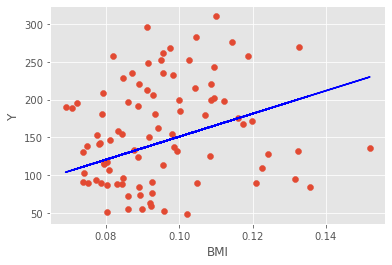

MSE: 4731.667192422656
R2: -0.05476041195320236

BP and Y:
Slope: [197.74202463]	Intercept: 80.01678131012532


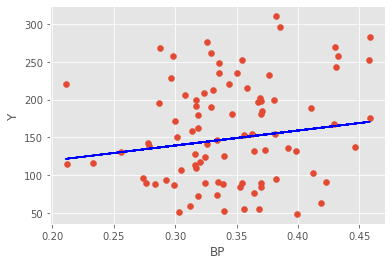

MSE: 4433.171772052835
R2: 0.011778746392424155

S1 and Y:
Slope: [-77.71853112]	Intercept: 204.76919237115567


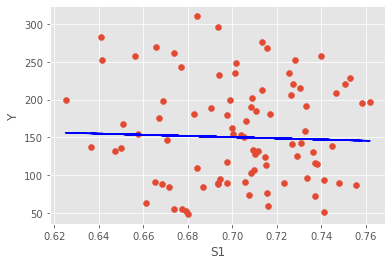

MSE: 4531.519160476633
R2: -0.010144378736605564

S2 and Y:
Slope: [67.95846833]	Intercept: 122.27659808562328


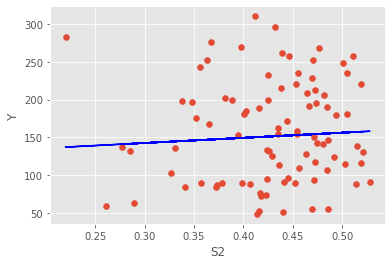

MSE: 4516.633783780518
R2: -0.0068262024115217645

S3 and Y:
Slope: [-710.55596412]	Intercept: 285.0893880969911


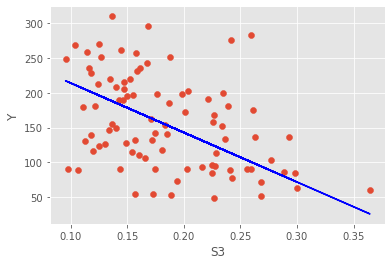

MSE: 3889.714005950932
R2: 0.13292372847627976

S4 and Y:
Slope: [8401.77723566]	Intercept: 24.686205985452574


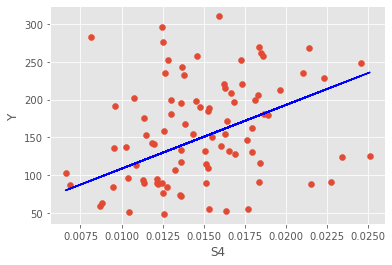

MSE: 4473.0575653966935
R2: 0.002887597859023483

S5 and Y:
Slope: [6088.78388039]	Intercept: 44.23796956275214


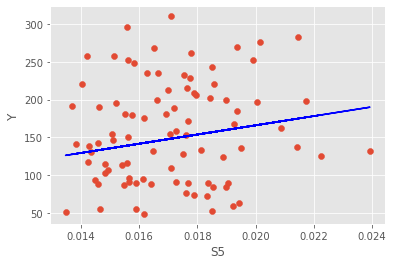

MSE: 4545.39132428571
R2: -0.013236694535437632

S6 and Y:
Slope: [71.49214762]	Intercept: 126.21037744125061


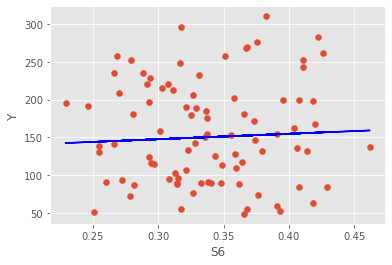

MSE: 4540.397604003706
R2: -0.012123518513620146


S3 having minimum mse should be used for the best prediction of Y


S3 having maximum r2_score should be used for the best prediction of Y


In [14]:
min_mse = 10e9
max_r2 = -10e9
for i in range(len(df.drop(columns=["Y"]).columns)):
    lr = LinearRegression()
    lr.fit(X_train_normalized[:,i].reshape(-1,1), y_train)
    print("\n{} and {}:\nSlope: {}\tIntercept: {}".format(cols[i], cols[-1], lr.coef_, lr.intercept_))
    y_pred = lr.predict(X_test_normalized[:,i].reshape(-1,1))
    plt.scatter(X_test_normalized[:,i].reshape(-1,1), y_test)
    plt.plot(X_test_normalized[:,i].ravel(), y_pred, color="b")
    plt.xlabel(cols[i])
    plt.ylabel("Y")
    plt.show()
    print("MSE: {}".format(mean_squared_error(y_test, y_pred)))
    print("R2: {}".format(r2_score(y_test, y_pred)))
    
    min_mse = min(min_mse, mean_squared_error(y_test, y_pred))
    if min_mse == mean_squared_error(y_test, y_pred):
        min_feature = cols[i]
    
    max_r2 = max(max_r2, r2_score(y_test, y_pred))
    if max_r2 == r2_score(y_test, y_pred):
        max_feature = cols[i]
print("\n\n{} having minimum mse should be used for the best prediction of {}".format(min_feature, cols[-1]))

print("\n\n{} having maximum r2_score should be used for the best prediction of {}".format(max_feature, cols[-1]))

# Question 2


AGE, SEX and Y:
Slope: [  144.43248076 -3900.84134195]	Intercept: 146.13888006908547


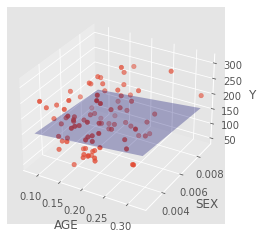

MSE: 4554.352887723809
R2: -0.01523436300181924

AGE, BMI and Y:
Slope: [  18.33936706 1510.98043644]	Intercept: -3.473002785817073


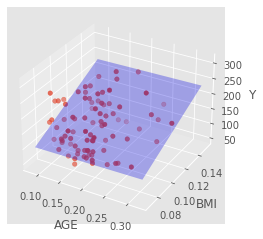

MSE: 4738.673115157934
R2: -0.056322138433502644

AGE, BP and Y:
Slope: [ 45.02899307 187.73285301]	Intercept: 75.363945679794


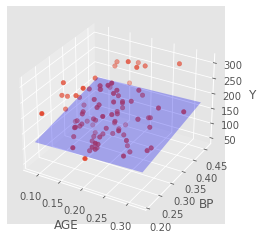

MSE: 4443.862560497062
R2: 0.009395607434215858

AGE, S1 and Y:
Slope: [102.17348492 -16.80291816]	Intercept: 143.7480050252262


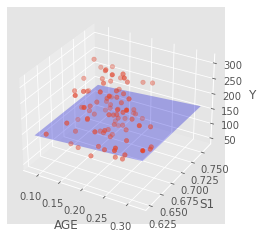

MSE: 4549.737547071721
R2: -0.014205533540758042

AGE, S2 and Y:
Slope: [144.59404208 101.64581867]	Intercept: 81.72395588499842


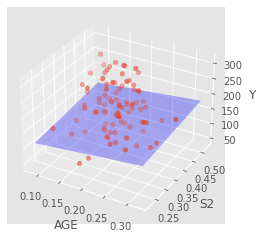

MSE: 4531.360634764944
R2: -0.01010904095012033

AGE, S3 and Y:
Slope: [  88.46524219 -708.77798763]	Intercept: 268.57806706798794


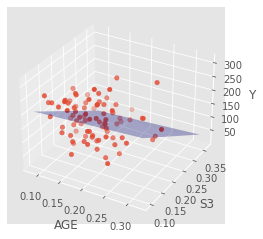

MSE: 3902.2777508204904
R2: 0.13012307911203203

AGE, S4 and Y:
Slope: [ 100.5782507  8388.22295334]	Intercept: 6.499638482380675


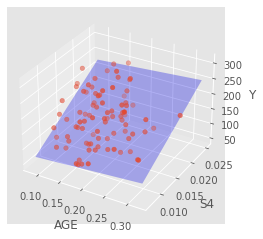

MSE: 4480.677203705883
R2: 0.0011890648652395086

AGE, S5 and Y:
Slope: [  61.08602842 5899.37173809]	Intercept: 36.382306977420114


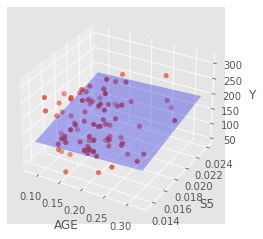

MSE: 4562.05670257229
R2: -0.016951660223442966

AGE, S6 and Y:
Slope: [96.46151441 49.9962961 ]	Intercept: 115.9517943346529


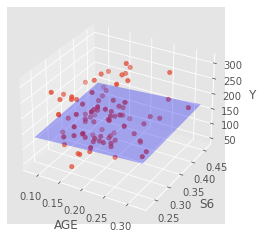

MSE: 4553.811954526556
R2: -0.015113780784437703

SEX, BMI and Y:
Slope: [-6680.76984713  1692.03560057]	Intercept: 19.131724613304414


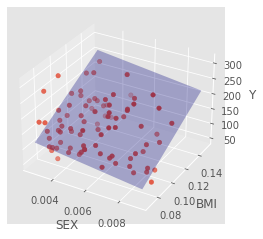

MSE: 4848.130177372637
R2: -0.08072177842036643

SEX, BP and Y:
Slope: [-6516.09979464   291.29217634]	Intercept: 82.96278427470784


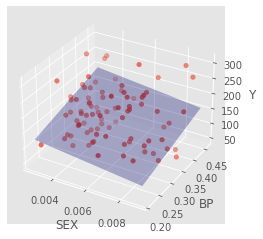

MSE: 4462.785070983041
R2: 0.005177492730937261

SEX, S1 and Y:
Slope: [-5027.35587279  -215.13184245]	Intercept: 328.3697809045194


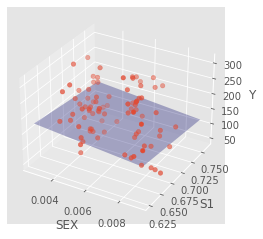

MSE: 4542.703756490332
R2: -0.012637594894714166

SEX, S2 and Y:
Slope: [-2949.56985862    50.17083263]	Intercept: 146.21063849144426


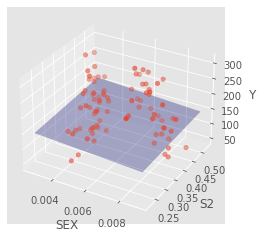

MSE: 4506.857891498967
R2: -0.00464700768992099

SEX, S3 and Y:
Slope: [-5769.11357395  -738.3135285 ]	Intercept: 322.573028783409


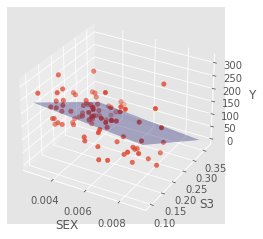

MSE: 3757.081744477486
R2: 0.16248947202097497

SEX, S4 and Y:
Slope: [-7955.69818381  9535.52829727]	Intercept: 52.128449278460835


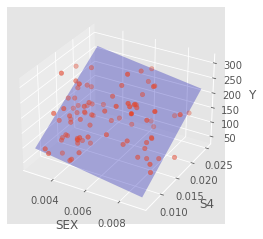

MSE: 4338.886549875762
R2: 0.032796353028800795

SEX, S5 and Y:
Slope: [-5940.54376724  7664.50093658]	Intercept: 49.86717483963221


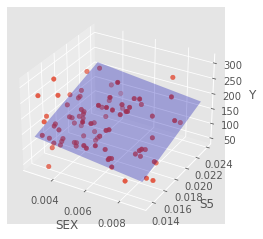

MSE: 4563.968765160964
R2: -0.01737788798665907

SEX, S6 and Y:
Slope: [-4464.1032231    143.40387018]	Intercept: 126.46984708980304


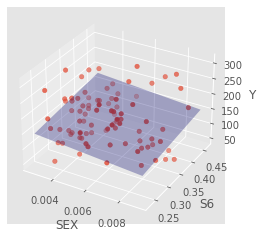

MSE: 4561.626954841811
R2: -0.016855862933649934

BMI, BP and Y:
Slope: [1644.46628548  -75.70262168]	Intercept: 13.631165495158115


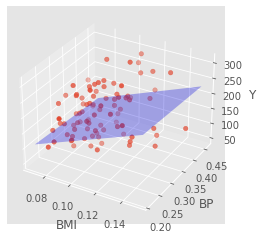

MSE: 4809.688061768658
R2: -0.07215244756046624

BMI, S1 and Y:
Slope: [1992.29218613  452.52979013]	Intercept: -362.7105932039972


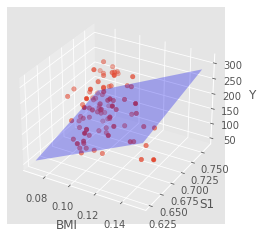

MSE: 4821.196237708399
R2: -0.07471779459384775

BMI, S2 and Y:
Slope: [1862.81251674  286.90614317]	Intercept: -155.4616318371253


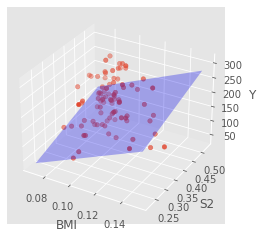

MSE: 4652.884960536015
R2: -0.03719865708328718

BMI, S3 and Y:
Slope: [1372.74796095 -678.39589505]	Intercept: 141.94109054448592


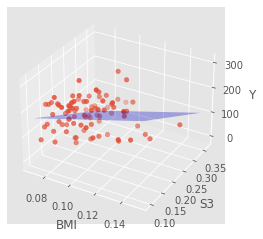

MSE: 3703.1665981827373
R2: 0.17450797619798786

BMI, S4 and Y:
Slope: [1169.56253328 7104.5827518 ]	Intercept: -72.63016025789943


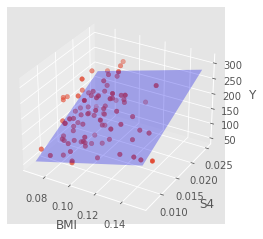

MSE: 4365.600103399927
R2: 0.02684149661687807

BMI, S5 and Y:
Slope: [1559.43758786 -566.35828347]	Intercept: 4.949246700864762


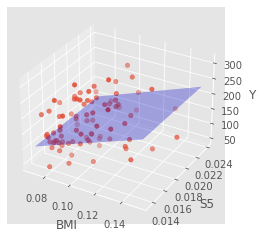

MSE: 4737.153976787759
R2: -0.05598349944052661

BMI, S6 and Y:
Slope: [1850.80214482 -264.20062027]	Intercept: 56.638479090717894


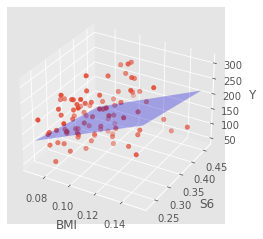

MSE: 4689.684200415366
R2: -0.04540176601640633

BP, S1 and Y:
Slope: [423.99816252 457.08013237]	Intercept: -318.61170988651577


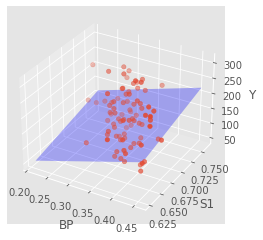

MSE: 4369.524602523822
R2: 0.025966666214761513

BP, S2 and Y:
Slope: [405.32380268 323.35097181]	Intercept: -129.7186400128174


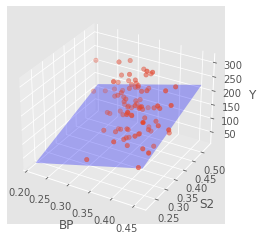

MSE: 4252.388931554004
R2: 0.0520779846025794

BP, S3 and Y:
Slope: [ 273.02213518 -740.95405987]	Intercept: 193.17426019409243


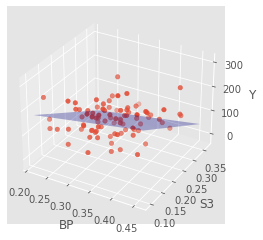

MSE: 3488.0530822172814
R2: 0.2224600428775243

BP, S4 and Y:
Slope: [ 192.02944278 8372.07424732]	Intercept: -43.558605419254604


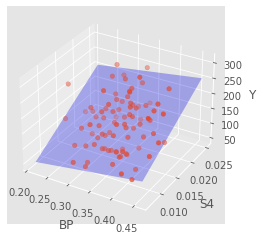

MSE: 4219.418408368054
R2: 0.05942761449066958

BP, S5 and Y:
Slope: [  88.25171078 4938.2008992 ]	Intercept: 32.79707486262531


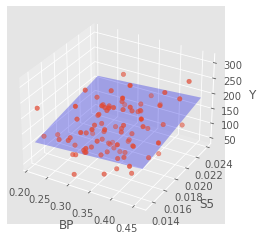

MSE: 4490.280803739791
R2: -0.0009517233001286041

BP, S6 and Y:
Slope: [228.93881214 -71.95264027]	Intercept: 93.55583632388817


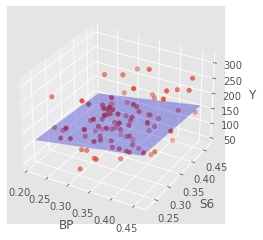

MSE: 4412.2834759881025
R2: 0.01643506452856014

S1, S2 and Y:
Slope: [-155.29942009  110.10699103]	Intercept: 212.5579695435606


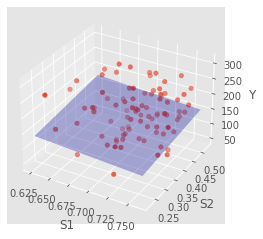

MSE: 4504.079339844193
R2: -0.004027626366417181

S1, S3 and Y:
Slope: [-105.96126257 -712.36269676]	Intercept: 359.0796457035383


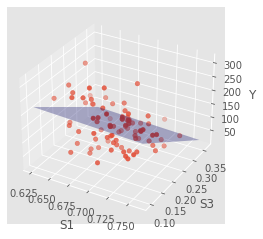

MSE: 3842.253649872665
R2: 0.1435033619739028

S1, S4 and Y:
Slope: [-7.04415186e+00  8.39650242e+03]	Intercept: 29.66140952279197


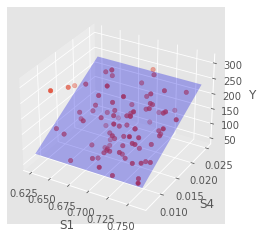

MSE: 4470.711149942707
R2: 0.003410649466461746

S1, S5 and Y:
Slope: [  83.34712414 6560.95158904]	Intercept: -21.952441113824108


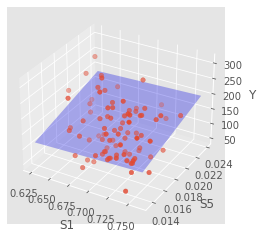

MSE: 4551.7161939976695
R2: -0.014646603963053506

S1, S6 and Y:
Slope: [-20.6997532   60.41205605]	Intercept: 144.4011416015739


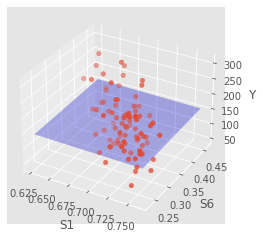

MSE: 4538.998054354607
R2: -0.01181153766112164

S2, S3 and Y:
Slope: [ -495.00591204 -1016.61400227]	Intercept: 550.3570601342832


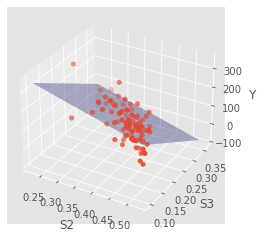

MSE: 3223.130327126715
R2: 0.28151534472601136

S2, S4 and Y:
Slope: [-130.47877867 9061.70320806]	Intercept: 69.4540150438694


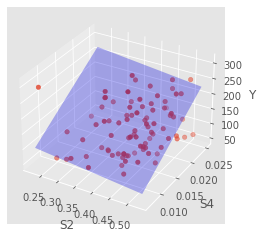

MSE: 4356.715103173484
R2: 0.028822097981668793

S2, S5 and Y:
Slope: [  414.38220526 12805.0140051 ]	Intercept: -246.8740232340317


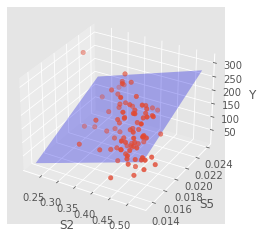

MSE: 4424.650060908795
R2: 0.013678365108471535

S2, S6 and Y:
Slope: [163.10497362 191.07474543]	Intercept: 16.822749193083325


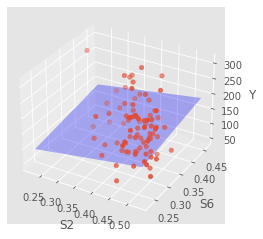

MSE: 4508.272444313941
R2: -0.004962332975740225

S3, S4 and Y:
Slope: [-720.57205334 -174.08887223]	Intercept: 289.59516081231834


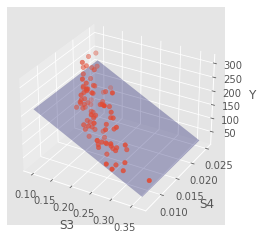

MSE: 3881.4922534590837
R2: 0.13475648185740652

S3, S5 and Y:
Slope: [-720.82494764 6683.0875706 ]	Intercept: 170.12180273294533


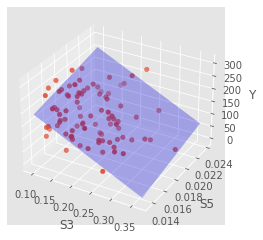

MSE: 3647.3311323520998
R2: 0.18695454873703587

S3, S6 and Y:
Slope: [-723.51521892  152.54549641]	Intercept: 235.17685155795058


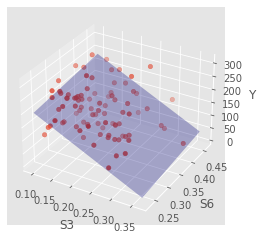

MSE: 3751.9591614062915
R2: 0.16363137351377033

S4, S5 and Y:
Slope: [7972.98895511 2411.57345054]	Intercept: -11.066343243740164


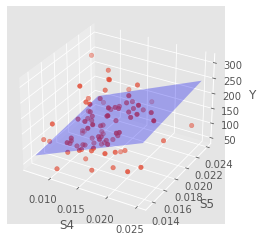

MSE: 4398.9756992887005
R2: 0.019401569877059877

S4, S6 and Y:
Slope: [ 8.41251827e+03 -7.30978477e+00]	Intercept: 27.03419225416843


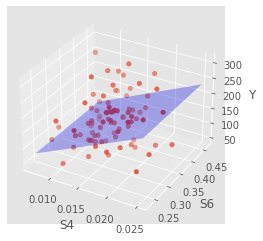

MSE: 4478.924243109639
R2: 0.0015798263802488943

S5, S6 and Y:
Slope: [8209.79660575 -174.18840271]	Intercept: 66.92627751762004


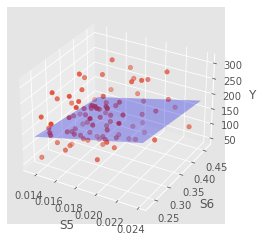

MSE: 4532.919304617989
R2: -0.010456492110448856


S2 and S3 having minimum mse should be used for the best prediction of Y


S2 and S3 having maximum r2_score should be used for the best prediction of Y


In [15]:
min_mse = 10e9
max_r2 = -10e9
for pair in itertools.combinations(df.drop(columns=["Y"]).columns, 2):
    lr = LinearRegression()
    lr.fit(X_train_normalized[:, [cols.index(pair[0]), cols.index(pair[1])]], y_train)
    print("\n{}, {} and {}:\nSlope: {}\tIntercept: {}".format(pair[0], pair[1], df.columns[-1], lr.coef_, lr.intercept_))
    y_pred = lr.predict(X_test_normalized[:, [cols.index(pair[0]), cols.index(pair[1])]])
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_test_normalized[:, [cols.index(pair[0])]],
               X_test_normalized[:, [cols.index(pair[1])]],
               y_test)
    x_range = [X_test_normalized[:, [cols.index(pair[0])]].min(), X_test_normalized[:, [cols.index(pair[0])]].max()]
    y_range = [X_test_normalized[:, [cols.index(pair[1])]].min(), X_test_normalized[:, [cols.index(pair[1])]].max()]
    X, Y = np.meshgrid(x_range, y_range)
    Z = lr.coef_[0]*X + lr.coef_[1]*Y + lr.intercept_
    ax.plot_surface(X,Y,Z, alpha=0.3 , color='b')
    ax.set_xlabel(pair[0])
    ax.set_ylabel(pair[1])
    ax.set_zlabel("Y")
    plt.show()
    print("MSE: {}".format(mean_squared_error(y_test, y_pred)))
    print("R2: {}".format(r2_score(y_test, y_pred)))
    
    min_mse = min(min_mse, mean_squared_error(y_test, y_pred))
    if min_mse == mean_squared_error(y_test, y_pred):
        min_feature1, min_feature2 = pair[0], pair[1]
    

    max_r2 = max(max_r2, r2_score(y_test, y_pred))
    if max_r2 == r2_score(y_test, y_pred):
        max_feature1, max_feature2 = pair[0], pair[1]
print("\n\n{} and {} having minimum mse should be used for the best prediction of {}".format(min_feature1, min_feature2, cols[-1]))
print("\n\n{} and {} having maximum r2_score should be used for the best prediction of {}".format(max_feature1, max_feature2, cols[-1]))

# Question 3

In [16]:
lr = LinearRegression()
lr.fit(X_train_normalized, y_train)
y_pred = lr.predict(X_test_normalized)
print("\nAll features({}) and {}:\nSlope: {}\nIntercept: {}".format(len(cols[:-1]), cols[-1], lr.coef_, lr.intercept_))
print("MSE: {}".format(mean_squared_error(y_test, y_pred)))
print("R2: {}".format(r2_score(y_test, y_pred)))


All features(10) and Y:
Slope: [   54.9457566  -7725.67428976  1538.20124408   260.04021849
   694.01027414  -553.51759877 -1186.56128349 -2140.61049234
 -5288.90887989    18.69316942]
Intercept: 29.367156484973435
MSE: 3044.6773297609598
R2: 0.32129522555051515


# Question 4


Training set size: (20, 10)
Training MSE: 2486.155151120166
Validation MSE: 5373.658543948307

Training set size: (50, 10)
Training MSE: 3145.059832276429
Validation MSE: 4830.053065588235

Training set size: (100, 10)
Training MSE: 3401.441864776496
Validation MSE: 3907.525533864761

Training set size: (200, 10)
Training MSE: 3284.3489378761574
Validation MSE: 3351.248213741068

Training set size: (400, 10)
Training MSE: 3247.568116632965
Validation MSE: 3321.915262270229


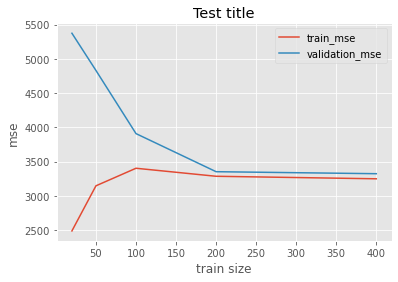

In [17]:
train_mse=[]
validation_mse = []
for i in [20, 50, 100, 200,400]:
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["Y"]), df["Y"], 
                                                        train_size=i, random_state=42)
    norm = Normalizer()
    X_train_normalized = norm.fit_transform(X_train)
    X_test_normalized = norm.transform(X_test)
    lr = LinearRegression()
    lr.fit(X_train_normalized, y_train)
    print("\nTraining set size: {}".format(X_train_normalized.shape))
    print("Training MSE: {}".format(mean_squared_error(y_train, lr.predict(X_train_normalized))))
    print("Validation MSE: {}".format(mean_squared_error(y_test, lr.predict(X_test_normalized))))
    train_mse.append(mean_squared_error(y_train, lr.predict(X_train_normalized)))
    validation_mse.append(mean_squared_error(y_test, lr.predict(X_test_normalized)))
        
plt.plot([20, 50, 100, 200, 400],train_mse, label= "train_mse")
plt.plot([20, 50, 100, 200, 400],validation_mse, label= "validation_mse")
plt.xlabel("train size")
plt.ylabel("mse")
plt.legend()
plt.title("Test title")


plt.show()